# Dimensionality Reduction Comparison: PCA vs UMAP vs t-SNE (Synthetic Datasets)

## 1. Introduction
In this notebook, we compare **PCA**, **UMAP**, and **t-SNE** on synthetic datasets.

### Why this comparison?
- High-dimensional data is often hard to visualize or interpret.
- Dimensionality reduction techniques help by mapping the data to 2D or 3D while trying to preserve important structure.

We’ll focus on two datasets:
1. **Swiss Roll** → Nonlinear structure, good for testing nonlinear methods.
2. **1D Line in High-Dimensional Noise** → Linear structure, good for testing PCA.

### What are we comparing?

📌 **PCA (Principal Component Analysis)**  
- Linear method.  
- Projects data onto directions of maximum variance.  
- Preserves global variance structure, but cannot "unroll" nonlinear shapes.  
- Think of it like shining a light on the dataset and looking at its shadow.  

📌 **UMAP (Uniform Manifold Approximation and Projection)**  
- Nonlinear manifold learning technique.  
- Builds a graph of nearest neighbors and tries to preserve both local neighborhoods and some global layout.  
- Very fast, scales well, and often works as a good default.  
- Intuition: it tries to learn the "map" of the manifold the data lives on.  

📌 **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
- Nonlinear technique focused almost entirely on local neighborhood preservation.  
- Similar points are pulled very close together; dissimilar points are pushed apart.  
- Amazing for clustering/local structures, but global distances can be misleading.  
- Intuition: Imagine each point as a magnet that attracts its neighbors but repels faraway points.  


In [15]:
# Import librariesS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="umap")

# Set random seed for reproducibility
np.random.seed(42)

# Set global matplotlib style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

## 2. Synthetic Dataset: Swiss Roll

The Swiss Roll is a classic toy dataset:

- Imagine a flat sheet of paper (2D) rolled into a spiral in 3D.  
- Our job is to "unroll" it back into 2D.  

### 2.1 Visualize Swiss Roll in 3D
We first visualize the dataset in its original 3D space to see the spiral structure.

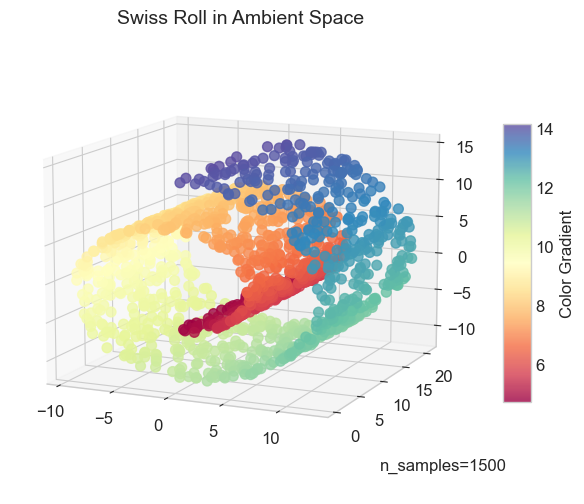

In [16]:
X_swiss, color_swiss = make_swiss_roll(n_samples=1500, noise=0.05)

# 3D visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
sc = ax.scatter(
    X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2],
    c=color_swiss, cmap='Spectral', s=50, alpha=0.8
)

# Title and view
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)

# Add sample info
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("Color Gradient")

plt.show()

### 2.2 Apply Dimensionality Reduction

We now apply the three methods:

- **PCA** → linear projection to 2D.  
- **UMAP** → nonlinear manifold learning.  
- **t-SNE** → nonlinear, neighborhood-based embedding.  

In [17]:
# PCA (linear)
pca = PCA(n_components=2)
X_swiss_pca = pca.fit_transform(X_swiss)

# UMAP (nonlinear)
umap_model = umap.UMAP(n_components=2, random_state=42)
X_swiss_umap = umap_model.fit_transform(X_swiss)

# t-SNE (nonlinear)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, 
            max_iter=1000, random_state=42)
X_swiss_tsne = tsne.fit_transform(X_swiss)

### 2.3 2D Comparison


Now we compare how PCA, UMAP, and t-SNE flatten the Swiss Roll into two dimensions.  

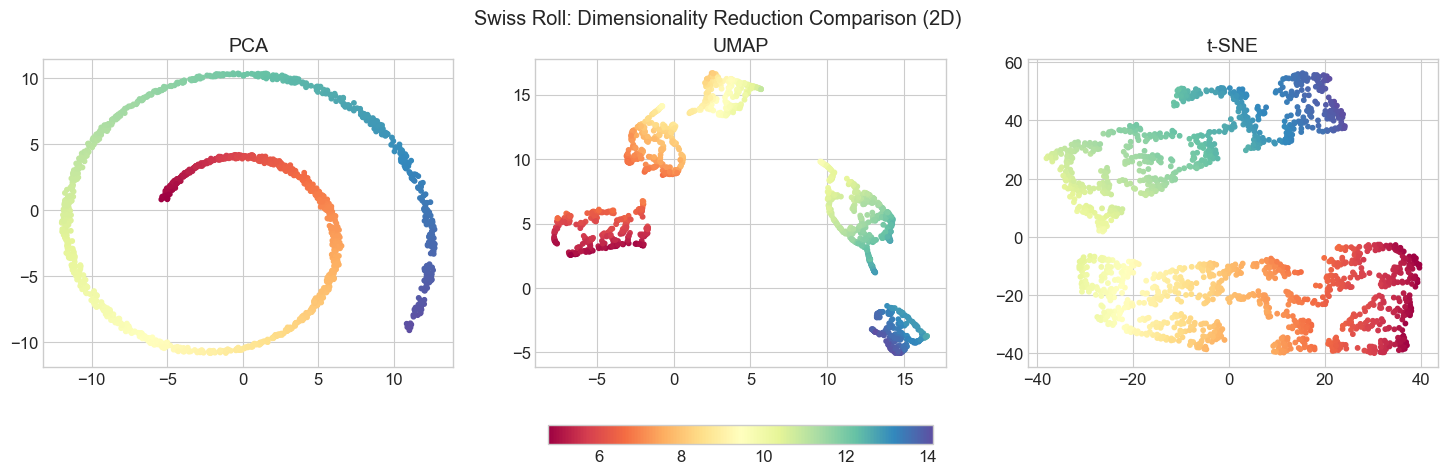

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
datasets = [X_swiss_pca, X_swiss_umap, X_swiss_tsne]
titles = ['PCA', 'UMAP', 't-SNE']

for ax, data, title in zip(axs, datasets, titles):
    sc = ax.scatter(data[:,0], data[:,1], c=color_swiss, cmap='Spectral', s=10)
    ax.set_title(title)
plt.colorbar(sc, ax=axs, orientation='horizontal', fraction=0.05)
plt.suptitle('Swiss Roll: Dimensionality Reduction Comparison (2D)')
plt.show()

✅ **Takeaway**  
- PCA flattens the Swiss Roll incorrectly due to its linear nature.  
- UMAP successfully unrolls the manifold while preserving both local and global structure.  
- t-SNE unrolls the manifold too, but may distort global distances while preserving neighborhoods.  

# 3. Synthetic Dataset: 1D Line in High-Dimensional Noise

This dataset is a **straight line** in 10D space, with some added noise.  

- Intrinsic dimension = 1D.  
- PCA should succeed by projecting onto the line.  
- Nonlinear methods may warp unnecessarily.  

This helps us see when **PCA outperforms nonlinear methods**.

### 3.1 Create the line in 10D space

In [19]:
# Create 1D line dataset in high-dimensional noise
t = np.linspace(-5, 5, 1000).reshape(-1, 1)   
noise = 0.1 * np.random.randn(1000, 9)        
X_line = np.hstack([t, noise])                
color_line = t.ravel()      

### 3.2 Apply the dimendion reduction techniques

In [20]:
                  

# Apply PCA
pca_line = PCA(n_components=2)
X_line_pca = pca_line.fit_transform(X_line)

# Apply UMAP
umap_line = umap.UMAP(n_components=2, random_state=42)
X_line_umap = umap_line.fit_transform(X_line)

# Apply t-SNE
tsne_line = TSNE(n_components=2, perplexity=30, learning_rate=200, 
                 max_iter=1000, random_state=42)
X_line_tsne = tsne_line.fit_transform(X_line)

### 3.3. 2D Comparison
Now we compare PCA, UMAP, and t-SNE on the line dataset.

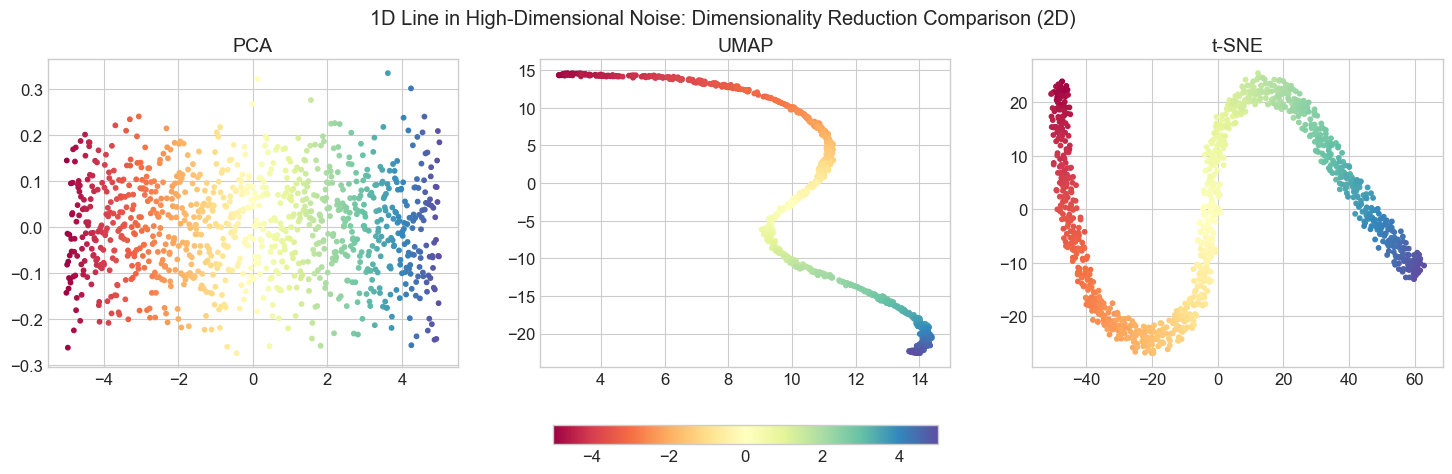

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
datasets = [X_line_pca, X_line_umap, X_line_tsne]
titles = ['PCA', 'UMAP', 't-SNE']

for ax, data, title in zip(axs, datasets, titles):
    sc = ax.scatter(data[:,0], data[:,1], c=color_line, cmap='Spectral', s=10)
    ax.set_title(title)
plt.colorbar(sc, ax=axs, orientation='horizontal', fraction=0.05)
plt.suptitle('1D Line in High-Dimensional Noise: Dimensionality Reduction Comparison (2D)')
plt.show()

✅ **Takeaway (1D Line)**  
- PCA correctly identifies the 1D linear structure.  
- UMAP and t-SNE introduce unnecessary distortions.  
- Here, **PCA outperforms nonlinear methods**.  

---

# Final Conclusion
- Use **PCA** when data has strong global linear structure (like noisy lines or Gaussian blobs).  
- Use **UMAP** when you want a balance of global + local preservation.  
- Use **t-SNE** when local clusters matter most (e.g., clustering, single-cell biology). 

---

### Note on PCA and Normalization

In this notebook, we do **not normalize the datasets before applying PCA**. Here's why:

- **Swiss Roll**: All dimensions are roughly on the same scale, so normalization isn't strictly necessary. PCA fails to "unroll" the spiral not because of scaling but because it's a **linear method**.

- **1D Line in High-Dimensional Noise**: The first dimension (the line) has much larger variance than the noise dimensions. If we normalized the data, PCA would treat the noise dimensions equally, and the main direction (the line) could be lost. Leaving the data unnormalized allows PCA to correctly capture the **dominant direction of variance**, which is exactly what we want to illustrate.

💡 **Rule of Thumb**: Scale features only when their units or variances differ significantly and you want them to contribute equally to PCA. Otherwise, leaving data unnormalized helps PCA detect natural variance directions.